In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ladataan CSV
df = pd.read_csv("/Users/nicopekkanen/Desktop/PremierLeague.csv", encoding="utf-8", low_memory=False)

print(">>> Luettu tiedosto: PremierLeague.csv")
print(">>> Rivejä:", len(df), " | Sarakkeita:", len(df.columns))

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
>>> Luettu tiedosto: PremierLeague.csv
>>> Rivejä: 12051  | Sarakkeita: 43


In [4]:
# Katsotaan satunnaisia rivejä
display(df.sample(10))

# Sarakkeiden tyyppi- ja puuttuva tieto -katsaus
display(df.info())

# Tilastollinen yhteenveto numeromuuttujista
display(df.describe(include=[np.number]))

# Tarkitstetaan eri sarakkeet
print("\nSarakkeet:", df.columns.tolist())

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
9092,2016-2017_Liverpool_Southampton,2016-2017,36,2017-05-07,NaN,Liverpool,Southampton,0,0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3168,2001-2002_West Ham_Tottenham,2001-2002,13,2001-11-24,NaN,West Ham,Tottenham,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
10104,2019-2020_Southampton_Wolves,2019-2020,23,2020-01-18,15:00,Southampton,Wolves,2,3,A,...,3.20,2.39,3.37,3.05,2.10,1.86,2.02,1.80,0,3
10927,2021-2022_Tottenham_West Ham,2021-2022,30,2022-03-20,16:30,Tottenham,West Ham,3,1,H,...,5.02,1.75,3.94,4.70,1.82,2.20,1.73,2.13,3,0
5735,2008-2009_West Brom_West Ham,2008-2009,4,2008-09-13,NaN,West Brom,West Ham,3,2,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
11398,2022-2023_Man United_Fulham,2022-2023,38,2023-05-28,16:30,Man United,Fulham,2,1,H,...,6.00,1.53,4.59,5.76,1.53,2.80,1.49,2.63,3,0
1305,1996-1997_Wimbledon_Blackburn,1996-1997,16,1996-12-14,NaN,Wimbledon,Blackburn,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
9370,2017-2018_Arsenal_Everton,2017-2018,26,2018-02-03,NaN,Arsenal,Everton,5,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
7294,2012-2013_Tottenham_Chelsea,2012-2013,8,2012-10-20,NaN,Tottenham,Chelsea,2,4,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
10455,2020-2021_Everton_Newcastle,2020-2021,21,2021-01-30,12:30,Everton,Newcastle,0,2,A,...,6.70,1.59,3.95,6.27,2.06,1.90,1.99,1.84,0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12051 entries, 0 to 12050
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MatchID                 12051 non-null  object 
 1   Season                  12051 non-null  object 
 2   MatchWeek               12051 non-null  int64  
 3   Date                    12051 non-null  object 
 4   Time                    2171 non-null   object 
 5   HomeTeam                12051 non-null  object 
 6   AwayTeam                12051 non-null  object 
 7   FullTimeHomeTeamGoals   12051 non-null  int64  
 8   FullTimeAwayTeamGoals   12051 non-null  int64  
 9   FullTimeResult          12051 non-null  object 
 10  HalfTimeHomeTeamGoals   11291 non-null  float64
 11  HalfTimeAwayTeamGoals   11291 non-null  float64
 12  HalfTimeResult          11291 non-null  object 
 13  Referee                 9391 non-null   object 
 14  HomeTeamShots           9391 non-null 

None

,MatchWeek,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,HalfTimeHomeTeamGoals,HalfTimeAwayTeamGoals,HomeTeamShots,AwayTeamShots,HomeTeamShotsOnTarget,AwayTeamShotsOnTarget,HomeTeamCorners,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
count,12051.000000,12051.000000,12051.000000,11291.000000,11291.000000,9391.000000,9391.000000,9391.000000,9391.000000,9391.000000,...,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,12051.000000,12051.000000
mean,18.947224,1.533234,1.164136,0.690993,0.511824,13.615270,10.789479,5.998296,4.701416,6.048238,...,5.069908,2.967918,4.307798,4.601193,1.837522,2.291764,1.774334,2.196555,1.627915,1.117584
std,11.004173,1.309824,1.149033,0.840351,0.731983,5.344261,4.685041,3.271394,2.755356,3.107227,...,5.248814,2.177333,1.385626,4.223740,0.288670,0.489332,0.267723,0.450417,1.313308,1.262888
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.170000,1.070000,2.970000,1.150000,1.210000,1.510000,1.190000,1.470000,0.000000,0.000000
25%,10.000000,1.000000,0.000000,0.000000,0.000000,10.000000,7.000000,4.000000,3.000000,4.000000,...,2.245000,1.650000,3.490000,2.180000,1.630000,1.950000,1.580000,1.880000,0.000000,0.000000
50%,19.000000,1.000000,1.000000,0.000000,0.000000,13.000000,10.000000,6.000000,4.000000,6.000000,...,3.300000,2.310000,3.830000,3.170000,1.810000,2.180000,1.750000,2.100000,1.000000,1.000000
75%,28.000000,2.000000,2.000000,1.000000,1.000000,17.000000,14.000000,8.000000,6.000000,8.000000,...,5.600000,3.360000,4.560000,5.265000,2.030000,2.510000,1.950000,2.410000,3.000000,3.000000
max,41.000000,9.000000,9.000000,5.000000,5.000000,43.000000,37.000000,24.000000,20.000000,20.000000,...,50.000000,18.090000,12.850000,37.570000,2.880000,5.060000,2.690000,4.540000,3.000000,3.000000



Sarakkeet: ['MatchID', 'Season', 'MatchWeek', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult', 'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeamPoints', 'AwayTeamPoints']


In [6]:
needed_cols = ["HomeTeam", "AwayTeam", "FullTimeHomeTeamGoals", "FullTimeAwayTeamGoals"]
for col in needed_cols:
    if col not in df.columns:
        print(f"Varoitus: Sarake '{col}' puuttuu, koodia pitää muokata!")
        
# Poista rivit, joissa näissä avainsarakkeissa on puuttuvia arvoja
df.dropna(subset=needed_cols, inplace=True)
df.reset_index(drop=True, inplace=True)

print("Datan koko puhdistuksen jälkeen:", len(df))

# Jos haluat, muunna "Date" datetimeksi
if "Date" in df.columns:
    # Kokeillaan parserointia
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=False)
    # Poista rivit, joissa päivämäärä ei muuntunut
    df = df.dropna(subset=["Date"]).reset_index(drop=True)

Datan koko puhdistuksen jälkeen: 12051


/var/folders/k2/s1lnx86d7n72fm8mbltgp8400000gn/T/ipykernel_49547/3509157407.py:15: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce", dayfirst=True)


In [7]:
display(df.head())

,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
0,1993-1994_Arsenal_Coventry,1993-1994,1,1993-08-14,NaN,Arsenal,Coventry,0,3,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
1,1993-1994_Aston Villa_QPR,1993-1994,1,1993-08-14,NaN,Aston Villa,QPR,4,1,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
2,1993-1994_Chelsea_Blackburn,1993-1994,1,1993-08-14,NaN,Chelsea,Blackburn,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3
3,1993-1994_Liverpool_Sheffield Weds,1993-1994,1,1993-08-14,NaN,Liverpool,Sheffield Weds,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0
4,1993-1994_Man City_Leeds,1993-1994,1,1993-08-14,NaN,Man City,Leeds,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [8]:
df = df.dropna()
print(len(df))
display(df.head())

2170


,MatchID,Season,MatchWeek,Date,Time,HomeTeam,AwayTeam,FullTimeHomeTeamGoals,FullTimeAwayTeamGoals,FullTimeResult,...,MarketMaxAwayTeam,MarketAvgHomeTeam,MarketAvgDraw,MarketAvgAwayTeam,MarketMaxOver2.5Goals,MarketMaxUnder2.5Goals,MarketAvgOver2.5Goals,MarketAvgUnder2.5Goals,HomeTeamPoints,AwayTeamPoints
9880,2019-2020_Liverpool_Norwich,2019-2020,1,2019-08-09,20:00,Liverpool,Norwich,4,1,H,...,23.00,1.14,8.75,19.83,1.45,3.11,1.41,2.92,3,0
9881,2019-2020_West Ham_Man City,2019-2020,1,2019-08-10,12:30,West Ham,Man City,0,5,A,...,1.29,11.84,6.28,1.25,1.51,2.77,1.48,2.65,0,3
9882,2019-2020_Bournemouth_Sheffield United,2019-2020,1,2019-08-10,15:00,Bournemouth,Sheffield United,1,1,D,...,4.00,2.01,3.53,3.83,2.00,1.99,1.90,1.93,1,1
9883,2019-2020_Burnley_Southampton,2019-2020,1,2019-08-10,15:00,Burnley,Southampton,3,0,H,...,2.85,2.68,3.22,2.78,2.20,1.78,2.12,1.73,3,0
9884,2019-2020_Crystal Palace_Everton,2019-2020,1,2019-08-10,15:00,Crystal Palace,Everton,0,0,D,...,2.52,3.13,3.27,2.40,2.25,1.74,2.18,1.70,1,1


In [9]:
def match_result(row):
    if row["FullTimeHomeTeamGoals"] > row["FullTimeAwayTeamGoals"]:
        return 2
    elif row["FullTimeHomeTeamGoals"] < row["FullTimeAwayTeamGoals"]:
        return 0
    else:
        return 1

df["Result"] = df.apply(match_result, axis=1)
print(df["Result"].value_counts())

Result
2    945
0    726
1    499
Name: count, dtype: int64


In [10]:
cat_cols = []
if "HomeTeam" in df.columns:
    cat_cols.append("HomeTeam")
if "AwayTeam" in df.columns:
    cat_cols.append("AwayTeam")
# Jos haluat koodata tuomarin 
if "Referee" in df.columns:
    cat_cols.append("Referee")


for c in cat_cols:
    df[c] = df[c].astype(str)  # varmistetaan, että on stringejä

# Luodaan label-enkooderit jokaiselle
encoders = {}
for c in cat_cols:
    le = LabelEncoder()
    df[c+"_enc"] = le.fit_transform(df[c])
    encoders[c] = le

In [12]:
# Etsitään kaikki numerosarakkeet
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Poistetaan "Result" (kohde) ja FTHG, FTAG jottei malliin vuoda suoraan lopputulos
exclude = ["HomeTeamPoints","AwayTeamPoints", "FullTimeHomeTeamGoals", "FullTimeAwayTeamGoals","Result"]
numeric_cols = [c for c in numeric_cols if c not in exclude]

print("Mahdolliset numeeriset featuret:", numeric_cols)

Mahdolliset numeeriset featuret: ['MatchWeek', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeam_enc', 'AwayTeam_enc', 'Referee_enc']


In [13]:
feature_cols = [c + "_enc" for c in cat_cols] + numeric_cols
print("Käytettävät feature-sarakkeet:", feature_cols)

Käytettävät feature-sarakkeet: ['HomeTeam_enc', 'AwayTeam_enc', 'Referee_enc', 'MatchWeek', 'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget', 'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners', 'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards', 'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamRedCards', 'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals', 'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw', 'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw', 'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals', 'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals', 'HomeTeam_enc', 'AwayTeam_enc', 'Referee_enc']


In [14]:
corr_matrix = df[feature_cols + ["Result"]].corr()
# Lasketaan korrelaatio "Resultiin"
corr_with_result = corr_matrix["Result"].sort_values(ascending=False)
print("Korrelaatio 'Result'-arvoon:")
print(corr_with_result)

Korrelaatio 'Result'-arvoon:
Result                    1.000000
HomeTeamShotsOnTarget     0.438633
HalfTimeHomeTeamGoals     0.427557
B365AwayTeam              0.344087
MarketAvgAwayTeam         0.335834
MarketMaxAwayTeam         0.321133
HomeTeamShots             0.261690
MarketAvgDraw             0.166983
MarketMaxDraw             0.166534
B365Draw                  0.165003
B365Under2.5Goals         0.121300
MarketMaxUnder2.5Goals    0.118331
MarketAvgUnder2.5Goals    0.116684
HomeTeamCorners           0.092842
AwayTeamRedCards          0.086698
AwayTeam_enc              0.059057
AwayTeam_enc              0.059057
Referee_enc               0.050902
Referee_enc               0.050902
AwayTeamYellowCards       0.049272
AwayTeamFouls             0.035221
MatchWeek                 0.016149
HomeTeamFouls            -0.001229
HomeTeam_enc             -0.044998
HomeTeam_enc             -0.044998
HomeTeamYellowCards      -0.068394
AwayTeamCorners          -0.086269
MarketAvgOver2.5Goals    -

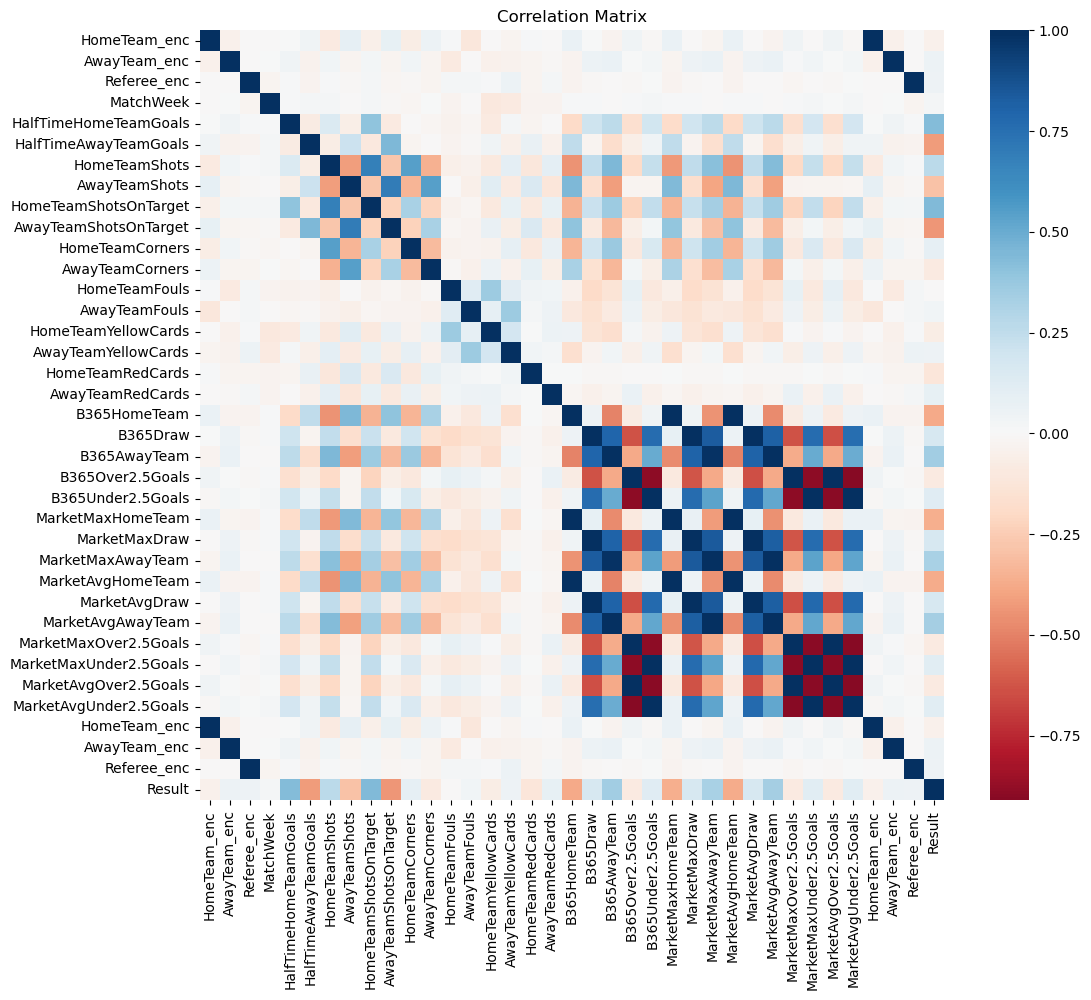

In [15]:
 
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, cmap="RdBu", center=0)
plt.title("Correlation Matrix")
plt.show()

In [16]:
X = df[feature_cols].copy()
y = df["Result"].copy()


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1736, 36) Test: (434, 36)


In [17]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy (test): {acc:.3f}")

cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy (test): 0.652
Confusion matrix:
 [[105  13  27]
 [ 34  20  46]
 [ 22   9 158]]
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.69       145
           1       0.48      0.20      0.28       100
           2       0.68      0.84      0.75       189

    accuracy                           0.65       434
   macro avg       0.60      0.59      0.57       434
weighted avg       0.63      0.65      0.62       434




Tärkeimmät ominaisuudet (feature importances):
HomeTeamShotsOnTarget: 0.0585
HalfTimeAwayTeamGoals: 0.0577
HalfTimeHomeTeamGoals: 0.0571
AwayTeamShotsOnTarget: 0.0525
MarketAvgHomeTeam: 0.0406
MarketMaxHomeTeam: 0.0373
MarketAvgAwayTeam: 0.0348
MarketMaxAwayTeam: 0.0341
B365AwayTeam: 0.0323
B365HomeTeam: 0.0312
HomeTeamShots: 0.0304
MatchWeek: 0.0300
AwayTeamShots: 0.0280
HomeTeamCorners: 0.0274
HomeTeamFouls: 0.0264
AwayTeamFouls: 0.0253
MarketMaxDraw: 0.0252
MarketAvgDraw: 0.0250
Referee_enc: 0.0249
AwayTeamCorners: 0.0247
Referee_enc: 0.0245
HomeTeam_enc: 0.0241
MarketMaxOver2.5Goals: 0.0237
MarketAvgUnder2.5Goals: 0.0230
AwayTeam_enc: 0.0227
MarketMaxUnder2.5Goals: 0.0224
HomeTeam_enc: 0.0224
MarketAvgOver2.5Goals: 0.0219
AwayTeam_enc: 0.0212
B365Over2.5Goals: 0.0175
AwayTeamYellowCards: 0.0174
B365Under2.5Goals: 0.0170
HomeTeamYellowCards: 0.0168
B365Draw: 0.0156
AwayTeamRedCards: 0.0038
HomeTeamRedCards: 0.0029


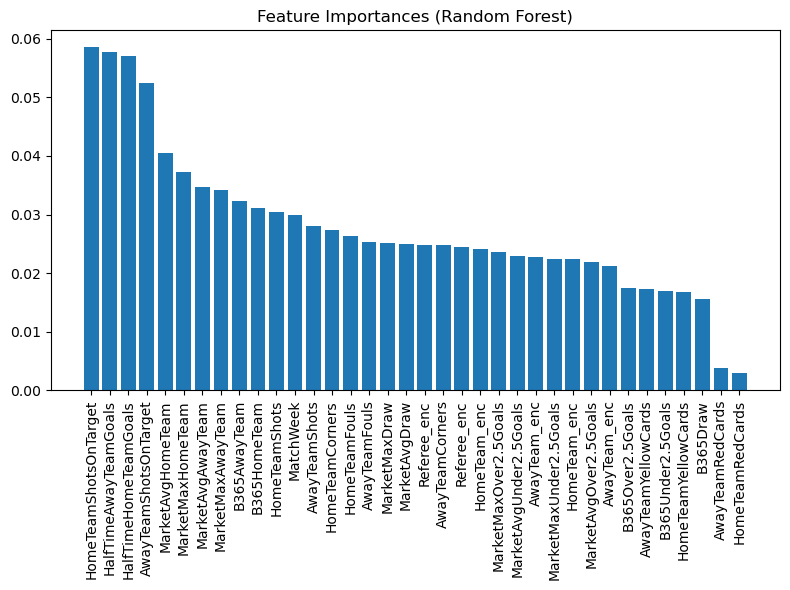

In [18]:
if hasattr(model, "feature_importances_"):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    print("\nTärkeimmät ominaisuudet (feature importances):")
    for i in indices:
        print(f"{feature_cols[i]}: {importances[i]:.4f}")
    
    # Voit myös piirtää niistä pylväskaavion
    plt.figure(figsize=(8,6))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [feature_cols[i] for i in indices], rotation=90)
    plt.title("Feature Importances (Random Forest)")
    plt.tight_layout()
    plt.show()

In [24]:
# Demoesimerkki: 3 tulevaa ottelua
upcoming_data = {
    "HomeTeam": ["Man City", "Brighton", "Nott'm Forest", "Southampton", "Arsenal", "Chelsea", "Liverpool", "Wolves", "Newcastle", 
                 "Bournemouth", "Newcastle", "Brentford", "Crystal Palace", "Everton", "West Ham", "Aston Villa", "Fulham", "Ipswich", 
                 "Man United", "Leicester", "Tottenham", "Man City", "Arsenal", "Chelsea", "Brighton", "Newcastle", "Southampton", "Wolves", 
                 "Bournemouth", "Liverpool", "Nott'm Forest", "Man City", "Aston Villa", "Everton", "Leicester", "West Ham", "Arsenal", 
                 "Brentford", "Brighton", "Chelsea", "Crystal Palace", "Newcastle", "Fulham", "Ipswich", "Man United", "Southampton", 
                 "Tottenham", "Wolves", "Bournemouth", "Nott'm Forest", "Liverpool", "Arsenal", "Aston Villa", "Brentford", "Brighton", 
                 "Chelsea", "Crystal Palace", "Everton", "Leicester", "Man City", "West Ham", "Bournemouth", "Fulham", "Ipswich", "Liverpool", 
                 "Man United", "Newcastle", "Nott'm Forest", "Southampton", "Tottenham", "Wolves"],
    "AwayTeam": ["Crystal Palace", "Leicester", "Everton", "Aston Villa", "Brentford", "Ipswich", "West Ham", "Tottenham", "Man United", 
                 "Fulham", "Crystal Palace", "Brighton", "Bournemouth", "Man City", "Southampton", "Newcastle", "Chelsea", "Arsenal", 
                 "Wolves", "Liverpool", "Nott'm Forest", "Aston Villa", "Crystal Palace", "Everton", "West Ham", "Ipswich", "Fulham", "Leicester", 
                 "Man United", "Tottenham", "Brentford", "Wolves", "Fulham", "Ipswich", "Southampton", "Tottenham", "Bournemouth", 
                 "Man United", "Newcastle", "Liverpool", "Nott'm Forest", "Chelsea", "Everton", "Brentford", "West Ham", "Man City", 
                 "Crystal Palace", "Brighton", "Aston Villa", "Leicester", "Arsenal", "Newcastle", "Tottenham", "Fulham", "Liverpool", 
                 "Man United", "Wolves", "Southampton", "Ipswich", "Bournemouth", "Nott'm Forest", "Leicester", "Man City", "West Ham", "Crystal Palace", 
                 "Aston Villa", "Everton", "Chelsea", "Arsenal", "Brighton", "Brentford"],
    # Voit lisätä muita sarakkeita (kuten "HS", "AS") tässä, jos haluat
}
upcoming_df = pd.DataFrame(upcoming_data)


# Koodaa samat kategoriat, jotka oli train-datassa
for c in cat_cols:
    le = encoders[c]  # Hakee jo luodun LabelEncoder-olion
    upcoming_df[c + "_enc"] = le.transform(upcoming_df[c])

missing_cols = set(feature_cols) - set(upcoming_df.columns)

for col in missing_cols:
    # Anna jokin järkevä placeholder. Esim. 0, 
    # tai kenties ottelun "keskiarvot" menneestä datasta
    upcoming_df[col] = 0

# Valitaan vain ne featuret, joilla malli koulutettiin
X_upcoming = upcoming_df[feature_cols]

# Ennustetaan
preds = model.predict(X_upcoming)
probs = model.predict_proba(X_upcoming)

# Tulkitaan 0/1/2 -> vierasvoitto/tasapeli/kotivoitto
outcome_map = {0: "Vierasvoitto", 1: "Tasapeli", 2: "Kotivoitto"}
upcoming_df["Prediction"] = [outcome_map[p] for p in preds]

# Lisätään todennäköisyydet
upcoming_df["Prob_VierasWin"] = probs[:, 0]
upcoming_df["Prob_Draw"] = probs[:, 1]
upcoming_df["Prob_HomeWin"] = probs[:, 2]

print("\nENNUSTE TULEVILLE OTTELUILLE:")
pd.set_option("display.max_rows", None)
display(upcoming_df)


ENNUSTE TULEVILLE OTTELUILLE:


,HomeTeam,AwayTeam,HomeTeam_enc,AwayTeam_enc,HomeTeamCorners,AwayTeamRedCards,MarketMaxDraw,MarketMaxAwayTeam,B365AwayTeam,HalfTimeHomeTeamGoals,...,MarketAvgHomeTeam,MarketMaxOver2.5Goals,Referee_enc,HomeTeamRedCards,HalfTimeAwayTeamGoals,MarketMaxHomeTeam,Prediction,Prob_VierasWin,Prob_Draw,Prob_HomeWin
0,Man City,Crystal Palace,15,7,0,0,0,0,0,0,...,0,0,0,0,0,0,Vierasvoitto,0.39,0.39,0.22
1,Brighton,Leicester,4,12,0,0,0,0,0,0,...,0,0,0,0,0,0,Vierasvoitto,0.41,0.39,0.20
2,Nott'm Forest,Everton,19,8,0,0,0,0,0,0,...,0,0,0,0,0,0,Vierasvoitto,0.40,0.39,0.21
3,Southampton,Aston Villa,21,1,0,0,0,0,0,0,...,0,0,0,0,0,0,Vierasvoitto,0.39,0.39,0.22
4,Arsenal,Brentford,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,Tasapeli,0.38,0.40,0.22
5,Chelsea,Ipswich,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,Vierasvoitto,0.40,0.40,0.20
6,Liverpool,West Ham,13,25,0,0,0,0,0,0,...,0,0,0,0,0,0,Tasapeli,0.37,0.38,0.25
7,Wolves,Tottenham,26,22,0,0,0,0,0,0,...,0,0,0,0,0,0,Tasapeli,0.35,0.39,0.26
8,Newcastle,Man United,17,16,0,0,0,0,0,0,...,0,0,0,0,0,0,Vierasvoitto,0.38,0.38,0.24
9,Bournemouth,Fulham,2,9,0,0,0,0,0,0,...,0,0,0,0,0,0,Tasapeli,0.38,0.40,0.22
